In [1]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
def trasforma_immagine(nome):

    size = 28, 28
    im = Image.open(f"./{nome}")
    im = im.convert('L')
    im_resized = im.resize(size, Image.ANTIALIAS)
    data = (np.asarray(im_resized)).reshape((1, -1))[0]

    return data, im_resized

In [3]:
data = pd.read_csv("./cifre.csv")
data

,Unnamed: 0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 786 entries, Unnamed: 0 to target
dtypes: float64(784), int64(2)
memory usage: 419.8 MB


In [5]:
features = list((data.columns))[1:-1]
features

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [6]:
data.dropna(inplace=True, subset=features+["target"])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Columns: 786 entries, Unnamed: 0 to target
dtypes: float64(784), int64(2)
memory usage: 420.3 MB


In [8]:
X = data[features].values
y = data["target"]

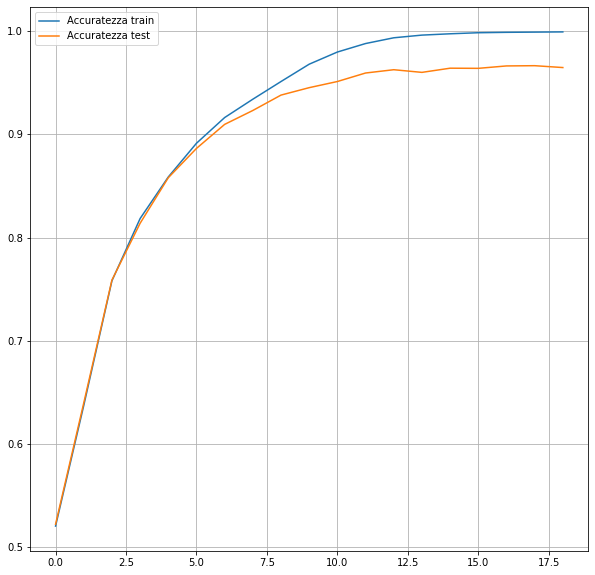

In [86]:
accs_train = []
accs_test = []

for i in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)
    foresta = RandomForestClassifier(max_depth=i, n_estimators=100)
    foresta.fit(X_train, y_train)
    accs_train.append(foresta.score(X_train, y_train))
    accs_test.append(foresta.score(X_test, y_test))
    

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(accs_train, label="Accuratezza train")
ax.plot(accs_test, label="Accuratezza test")
ax.legend()
ax.grid()
plt.show()

In [87]:
accs_test = np.array(accs_test)
max_acc = accs_test.max()
np.where(accs_test == max_acc)[0]

array([17])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)
foresta = RandomForestClassifier(max_depth=17, n_estimators=100)
foresta.fit(X_train, y_train)

RandomForestClassifier(max_depth=17)

In [65]:
narray, im_resized = trasforma_immagine('7.jpeg')
im_resized

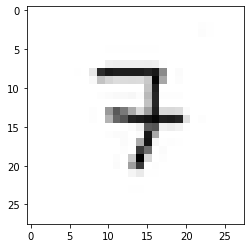

In [66]:
plt.imshow(narray.reshape(28, -1), cmap="gray")

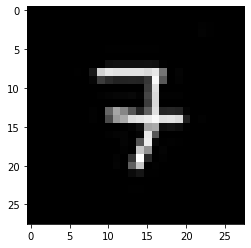

In [67]:
narray = 255-narray
plt.imshow(narray.reshape(28, -1), cmap="gray")

In [68]:
foresta.predict([narray])

array([9])

In [69]:
foresta.predict_proba([narray])

array([[0.        , 0.07032139, 0.09382776, 0.11645682, 0.20851608,
        0.08077026, 0.02227892, 0.16884313, 0.02316119, 0.21582445]])

## Miglioramenti

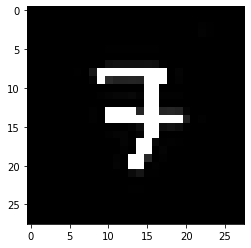

In [86]:
narray, im_resized = trasforma_immagine('7.jpeg')
narray = 255-narray
narray[narray > 50] = 255 # setto sopra una determinata soglia uguale a bianco
plt.imshow(narray.reshape(28, -1), cmap="gray")

In [87]:
foresta.predict([narray])

array([7])